In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wave_hdu = fits.open('WAVE_PHOENIX-ACES-AGSS-COND-2011.fits')
spec_hdu = fits.open('lte05500-0.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits')

In [3]:
wave_hdu.info()

Filename: WAVE_PHOENIX-ACES-AGSS-COND-2011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (1569128,)   float64   


In [4]:
wave_hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =              1569128                                                  
EXTEND  =                    T                                                  
EXTNAME = 'PRIMARY '                                                            
UNIT    = 'Angstrom'                                                            
COMMENT Wavelength array for PHOENIX grid 'PHOENIX-ACES-AGSS-COND-2011'         

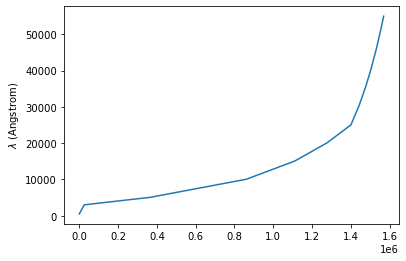

In [5]:
w = wave_hdu[0].data
plt.plot(w);
plt.ylabel(f"$\lambda$ ({wave_hdu[0].header['UNIT']})");

In [6]:
spec_hdu.info()

Filename: lte05500-0.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (1569128,)   float32   
  1  ABUNDANCES    1 BinTableHDU     15   83R x 3C   [I, 2A, E]   


In [7]:
spec_hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =              1569128                                                  
EXTEND  =                    T                                                  
EXTNAME = 'PRIMARY '                                                            
WAVE    = '../../WAVE_PHOENIX-ACES-AGSS-COND-2011.fits' / Wavelength array      
PHXTEFF =               5500.0 / [K] effective temperature                      
PHXLOGG =                  0.0 / [cm/s^2] log (surface gravity)                 
PHXM_H  =                  0.0 / [M/H] metallicity (rel. sol. - Asplund &a 2009)
PHXALPHA=                  0.0 / [a/M] alpha element enhancement                
PHXDUST =                    F / Dust in atmosphere                             
PHXEOS  = 'ACES    '        

In [8]:
f = spec_hdu[0].data

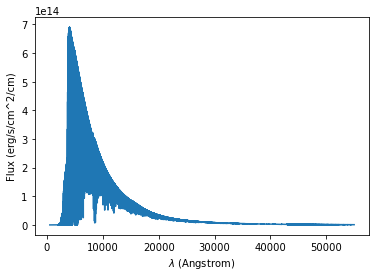

In [9]:
plt.plot(w, f);
plt.xlabel(f"$\lambda$ ({wave_hdu[0].header['UNIT']})")
plt.ylabel(f"Flux ({spec_hdu[0].header['BUNIT']})");

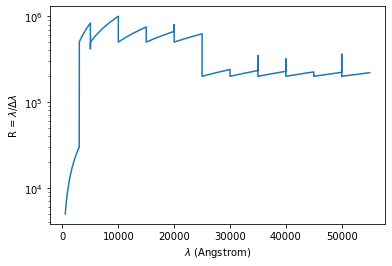

In [10]:
R = w/np.gradient(w)
plt.semilogy(w, R)
plt.xlabel(f"$\lambda$ ({wave_hdu[0].header['UNIT']})")
plt.ylabel(f"R = $\lambda/\Delta\lambda$");